In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load California Housing data
california_housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
try:
    housing_df = pd.read_csv(california_housing_url)
    print("California Housing dataset loaded.")
except Exception as e:
    print(f"Error loading California Housing dataset: {e}")
    housing_df = pd.DataFrame()

if not housing_df.empty:
    if 'ocean_proximity' in housing_df.columns:
        housing_df_processed = housing_df.drop('ocean_proximity', axis=1)
    else:
        housing_df_processed = housing_df.copy()

    nan_columns = housing_df_processed.columns[housing_df_processed.isnull().any()].tolist()
    if nan_columns:
        imputer = SimpleImputer(strategy='mean')
        for col in nan_columns:
            if housing_df_processed[col].dtype in ['int64', 'float64']:
                housing_df_processed[col] = imputer.fit_transform(housing_df_processed[[col]])

    X_housing = housing_df_processed.drop('median_house_value', axis=1)
    y_housing = housing_df_processed['median_house_value']

    print("\n--- Linear Regression with 70:30 Train-Test Split ---")
    X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)
    linear_reg_70 = LinearRegression()
    linear_reg_70.fit(X_train_70, y_train_70)
    y_pred_70 = linear_reg_70.predict(X_test_70)
    print(f"Mean Squared Error (70:30): {mean_squared_error(y_test_70, y_pred_70):.2f}")
    print(f"R-squared (70:30): {r2_score(y_test_70, y_pred_70):.2f}")

    print("\n--- Linear Regression with 80:20 Train-Test Split ---")
    X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
    linear_reg_80 = LinearRegression()
    linear_reg_80.fit(X_train_80, y_train_80)
    y_pred_80 = linear_reg_80.predict(X_test_80)
    print(f"Mean Squared Error (80:20): {mean_squared_error(y_test_80, y_pred_80):.2f}")
    print(f"R-squared (80:20): {r2_score(y_test_80, y_pred_80):.2f}")
else:
    print("Skipping Linear Regression section due to data loading issues.")

California Housing dataset loaded.

--- Linear Regression with 70:30 Train-Test Split ---
Mean Squared Error (70:30): 4852059947.13
R-squared (70:30): 0.63

--- Linear Regression with 80:20 Train-Test Split ---
Mean Squared Error (80:20): 5052953703.90
R-squared (80:20): 0.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

--- Logistic Regression Results ---
Accuracy: 0.71

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1   

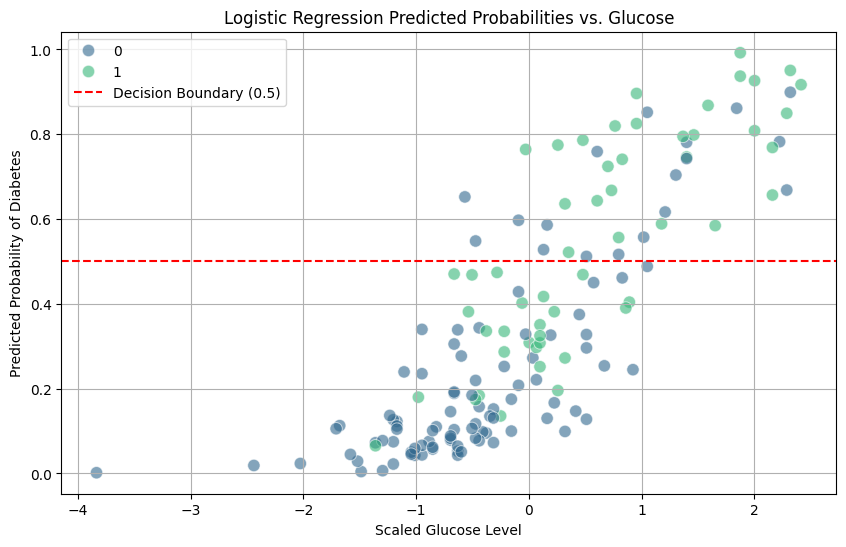

The scatter plot shows predicted probability of diabetes for test set patients based on 'Scaled Glucose Level'.
The dashed red line at 0.5 represents the decision boundary.


In [12]:
diabetes_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
try:
    diabetes_df = pd.read_csv(diabetes_url)
except Exception as e:
    diabetes_df = pd.DataFrame()

diabetes_df.info()

if not diabetes_df.empty:
    X_diabetes = diabetes_df.drop('Outcome', axis=1)
    y_diabetes = diabetes_df['Outcome']

    X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes)

    scaler_d = StandardScaler()
    X_train_scaled_d = scaler_d.fit_transform(X_train_d)
    X_test_scaled_d = scaler_d.transform(X_test_d)

    logistic_reg = LogisticRegression(random_state=42)
    logistic_reg.fit(X_train_scaled_d, y_train_d)
    y_pred_d = logistic_reg.predict(X_test_scaled_d)
    y_pred_proba_d = logistic_reg.predict_proba(X_test_scaled_d)[:, 1]

    print("\n--- Logistic Regression Results ---")
    print(f"Accuracy: {accuracy_score(y_test_d, y_pred_d):.2f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test_d, y_pred_d))
    print("\nClassification Report:\n", classification_report(y_test_d, y_pred_d))

    # --- Draw Logistic Regression Graph ---
    # Visualizing the probability curve for a single feature ('Glucose')
    test_df_d = pd.DataFrame(X_test_scaled_d, columns=X_diabetes.columns)
    test_df_d['Actual Outcome'] = y_test_d.values
    test_df_d['Predicted Probability'] = y_pred_proba_d

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Glucose',  # You can change this glucose to any other column as well.
        y='Predicted Probability',
        hue='Actual Outcome',
        data=test_df_d,
        palette='viridis',
        alpha=0.6,
        s=80
    )
    plt.title('Logistic Regression Predicted Probabilities vs. Glucose')
    plt.xlabel('Scaled Glucose Level')
    plt.ylabel('Predicted Probability of Diabetes')
    plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("The scatter plot shows predicted probability of diabetes for test set patients based on 'Scaled Glucose Level'.")
    print("The dashed red line at 0.5 represents the decision boundary.")
else:
    print("Skipping Logistic Regression section due to data loading issues.")

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

print("--- Conceptual Regression on Small Email ---")
print("Applying regression to email data involves converting text into numerical features (NLP).")
print("Key steps: 1. Text Preprocessing. 2. Feature Extraction (e.g., Bag-of-Words). 3. Model Training.")

# Mock Data for Demonstration (predicting 'urgency score' from email content)
emails = [
    "Urgent: Please respond immediately to this critical issue.",
    "Quick question about the meeting next week.",
    "FYI: Project update and status report.",
    "High priority: Action required on security breach. Urgent response needed.",
    "Casual chat, no hurry.",
    "Reminder: Task due by end of day.",
    "This is an emergency, drop everything and respond now."
]
urgency_scores = [9, 3, 2, 10, 1, 4, 9.5]

print("\nMock Emails with Urgency Scores:")
for i, email in enumerate(emails):
    print(f"Email {i+1}: '{email}' (Urgency: {urgency_scores[i]})")

# Feature Extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_email = vectorizer.fit_transform(emails)
y_email = np.array(urgency_scores)

# Apply a Regression Model (Linear Regression)
email_reg_model = LinearRegression()
email_reg_model.fit(X_email, y_email)

predictions_email = email_reg_model.predict(X_email)
print("\n--- Regression Results (Conceptual) ---")
print("Actual Urgency Scores:", y_email)
print("Predicted Urgency Scores:", np.round(predictions_email, 2))

# Demonstrate a new prediction
new_email = ["Urgent follow-up needed now."]
new_email_features = vectorizer.transform(new_email)
predicted_new_urgency = email_reg_model.predict(new_email_features)
print(f"\nPrediction for new email: '{new_email[0]}' -> Predicted Urgency Score: {predicted_new_urgency[0]:.2f}")

print("\nConceptual Summary:")
print("By transforming text into numerical features, standard regression models can predict continuous values from text.")

--- Conceptual Regression on Small Email ---
Applying regression to email data involves converting text into numerical features (NLP).
Key steps: 1. Text Preprocessing. 2. Feature Extraction (e.g., Bag-of-Words). 3. Model Training.

Mock Emails with Urgency Scores:
Email 1: 'Urgent: Please respond immediately to this critical issue.' (Urgency: 9)
Email 2: 'Quick question about the meeting next week.' (Urgency: 3)
Email 3: 'FYI: Project update and status report.' (Urgency: 2)
Email 4: 'High priority: Action required on security breach. Urgent response needed.' (Urgency: 10)
Email 5: 'Casual chat, no hurry.' (Urgency: 1)
Email 6: 'Reminder: Task due by end of day.' (Urgency: 4)
Email 7: 'This is an emergency, drop everything and respond now.' (Urgency: 9.5)

--- Regression Results (Conceptual) ---
Actual Urgency Scores: [ 9.   3.   2.  10.   1.   4.   9.5]
Predicted Urgency Scores: [ 9.   3.   2.  10.   1.   4.   9.5]

Prediction for new email: 'Urgent follow-up needed now.' -> Predicted